In [2]:
# node classification using club feature of karate club dataset

# create data using random walk architecture
# train word2vec model using skipgram algorithm
# node embedding from word2vec model
# train tsne model to classify nodes
# random forest classifier for testing


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier #for testing
from sklearn.metrics import accuracy_score

In [6]:
G = nx.karate_club_graph()
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [13]:
G.nodes[2],G.nodes[9] # all of these datapoints have a feature named club that takes 2 values either Mr. Hi or Officer

({'club': 'Mr. Hi'}, {'club': 'Officer'})

In [14]:
for i in G:
  print(G.nodes[i])

{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Mr. Hi'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}
{'club': 'Officer'}


In [9]:
# Process labels (Mr. Hi = 0, Officer = 1)
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

In [11]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

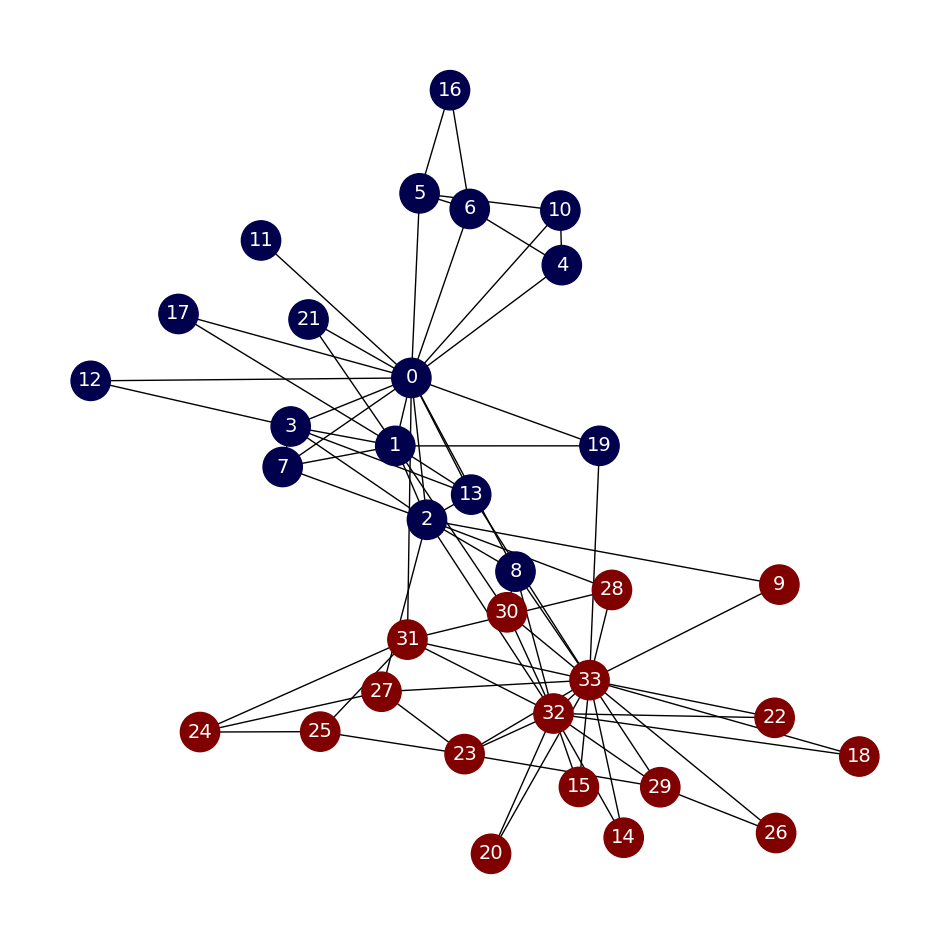

In [17]:
# Plot graph
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='seismic',
                 font_size=14,
                 font_color='white'
                 )

# a graph is made with 2 classes according to the labels, that we need to seperate/classify with our model

In [22]:
len(G)

34

In [18]:
def random_walk(start, length):
    walk = [str(start)]  # starting node

    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node

    return walk

In [19]:
# Create a list of random walks (dataset)
walks = []
for node in G.nodes:
    # 80 random walks of length 10 for every node
    for _ in range(80):
        walks.append(random_walk(node, 10))

# Print the first random walk
print(walks[0])

['0', '8', '0', '17', '1', '19', '1', '17', '1', '7', '2']


In [20]:
walks

[['0', '8', '0', '17', '1', '19', '1', '17', '1', '7', '2'],
 ['0', '21', '0', '19', '1', '17', '0', '4', '6', '4', '0'],
 ['0', '2', '28', '31', '25', '23', '29', '23', '33', '14', '33'],
 ['0', '13', '3', '12', '0', '10', '5', '6', '0', '1', '2'],
 ['0', '6', '0', '6', '16', '5', '16', '5', '10', '4', '10'],
 ['0', '8', '0', '8', '32', '33', '19', '33', '30', '8', '32'],
 ['0', '8', '2', '8', '2', '3', '7', '2', '32', '30', '32'],
 ['0', '17', '1', '7', '0', '12', '3', '0', '17', '0', '8'],
 ['0', '19', '0', '21', '0', '13', '33', '8', '33', '29', '32'],
 ['0', '6', '5', '0', '3', '13', '0', '7', '1', '2', '13'],
 ['0', '13', '2', '9', '33', '32', '29', '26', '33', '8', '33'],
 ['0', '8', '30', '8', '30', '33', '29', '23', '32', '18', '33'],
 ['0', '31', '25', '24', '31', '0', '19', '33', '19', '33', '26'],
 ['0', '31', '32', '33', '26', '33', '9', '33', '29', '23', '25'],
 ['0', '5', '16', '6', '0', '13', '0', '17', '0', '11', '0'],
 ['0', '8', '33', '14', '33', '14', '33', '14', '3

In [24]:
len(walks) # 80 paths for each of 34 nodes is a dataset passed onto word2vec model
#data using random walk--group frequently occuring are close in the graph

2720

In [25]:
model = Word2Vec(walks,
                 hs=1,   # Hierarchical softmax
                 sg=1,   # Skip-gram
                 vector_size=100,
                 window=10,
                 workers=1,
                 seed=1)

# using hierarchial softmax function and the skip gram algortihm
# vector size is 100 == size of the word embedding for word
# window size = 10

print(f'Shape of embedding matrix: {model.wv.vectors.shape}')

# Build vocabulary
model.build_vocab(walks)

# Train model
model.train(walks, total_examples=model.corpus_count, epochs=30, report_delay=1)

Shape of embedding matrix: (34, 100)


(186869, 897600)

In [26]:
# Most similar nodes (using cosine similarity)
print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f' {similarity}')

Nodes that are the most similar to node 0:
 ('4', 0.6981554627418518)
 ('10', 0.681305468082428)
 ('21', 0.6704028248786926)
 ('17', 0.6582421660423279)
 ('6', 0.6550753712654114)
 ('5', 0.6400434374809265)
 ('3', 0.62099689245224)
 ('12', 0.6074427366256714)
 ('11', 0.6033382415771484)
 ('7', 0.5892536640167236)


In [27]:
# Similarity between two nodes
print(f"\nSimilarity between node 0 and 4: {model.wv.similarity('0', '4')}")


Similarity between node 0 and 4: 0.6981554627418518


In [28]:
# they are numbers but we pass them as string because they are node names hence we need to pass them as a string

In [31]:
model.wv.get_vector('2')
# len(model.wv.get_vector('2')) 100

array([ 0.01038226,  0.03849801, -0.08956737,  0.12230727,  0.04392831,
        0.00840257,  0.13134469,  0.10719471, -0.09267494, -0.12245581,
        0.12287171,  0.15199243, -0.12460885,  0.18266937,  0.11331782,
       -0.02177452,  0.20835221,  0.1995461 , -0.01876554, -0.10785681,
       -0.06502814, -0.24323283,  0.2664505 , -0.00816055,  0.09816357,
        0.13713834, -0.07505986, -0.00162533,  0.0421153 ,  0.1179677 ,
        0.31408384, -0.01119696,  0.03673364, -0.11050957,  0.05648289,
        0.00595851, -0.2114415 , -0.21680333,  0.01097785, -0.1308247 ,
        0.16169487, -0.2418074 ,  0.1420411 , -0.02294897,  0.12406579,
        0.1602632 ,  0.06895008, -0.24633306, -0.04220843, -0.12960935,
        0.03759103, -0.29761547, -0.24068736,  0.04954126, -0.13537037,
       -0.06296983,  0.0436098 , -0.03527293, -0.04387688, -0.11283113,
       -0.01467238,  0.02677383,  0.16160938,  0.06831283,  0.01180763,
        0.1757062 ,  0.18990126,  0.21616952, -0.27876827,  0.04

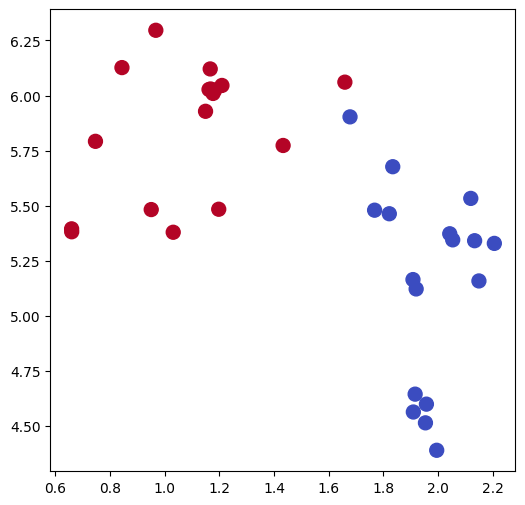

In [32]:
from sklearn.manifold import TSNE

# Preprocess word vectors and label
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
labels = np.array(labels)

# Train TSNE
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0).fit_transform(nodes_wv)

# Plot TSNE
plt.figure(figsize=(6, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=labels, cmap="coolwarm")
plt.show()